<a href="https://colab.research.google.com/github/jeekyung/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_ch4_1~5_pg_183~200%2C_212~227.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**[CHAPTER 04] 분류(Classification)**
---

## **01 분류의 개요**

지도학습은 레이블(Label), 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식.

지도학습의 대표적인 유형인 분류(Classification)는

학습 데이터로 주어진 데이터의 피처와 레이블값(결정값, 클래스값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고,

이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값 예측

(=기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 것)

---

분류는 다양한 머신러닝 알고리즘으로 구현할 수 있음

-베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)

-독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)

-데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)

-개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신

-근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor) 알고리즘

-심층 연결 기반의 신경망(Neural Network)

-서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)

**앙상블(Ensemble)** 방법은 분류에서 가장 각광을 받는 방법.

배깅(Bagging)과 부스팅(Boosting) 방식으로 나뉨

배깅 방식의 대표적 예: 랜덤 포레스트(Random Forest)

부스팅 방식의 효시: 그래디언트 부스팅(Gradient Boosting). 뛰어난 예측 성능, 수행시간 길다->최적화 모델 튜닝 어려움

XgBoost(eXtra Gradient Boost)와 LightGBM 등

기존 그래디언트 부스팅의 예측 성능을 한 단계 발전시키면서도 수행 시간 단축 시킨 알고리즘 계속 등장하며

정형 데이터의 분류 영역에서 가장 활용도가 높은 알고리즘으로 자리잡음

---

앙상블은 서로 다른/또는 같은 알고리즘 결합(대부분 동일한 알고리즘을 결합)

앙상블의 기본 알고리즘으로 일반적으로 <u>결정 트리</u> 사용

결정 트리:

-쉽고 유연하게 적용될 수 있는 알고리즘

-데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음

-예측 성능 향상시키기 위해 복잡한 규칙 구조를 가져야하며,

이로 인한 과적합(overfitting)이 발생해 반대로 예측 성능이 저하될 수도 있음

## **02 결정트리(Decision Tree)**

:데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것

일반적으로 규칙을 가장 쉽게 표현하는 방법은 if/else 기반으로 나타내는 것

(스무고개 게임과 유사하여 룰 기반의 프로그램에 적용되는 if, else를 자동으로 찾아내 예측을 위한 규칙을 만드는 알고리즘)

->데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우

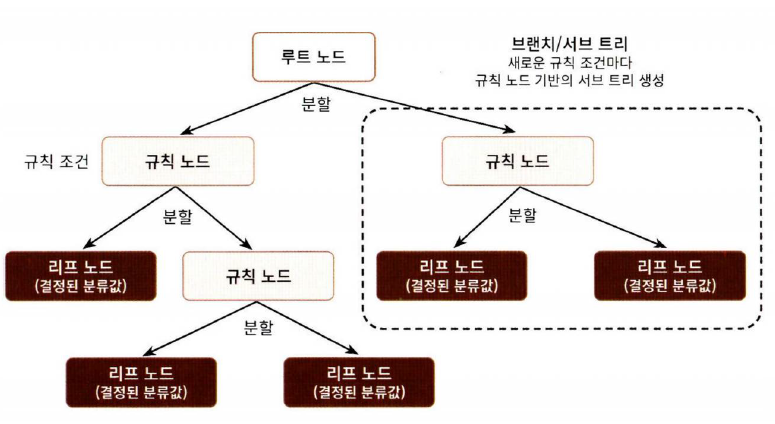

많은 규칙이 있음->분류를 결정하는 방식이 더욱 복잡해짐->과적합

트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음

---

가능한 한 적은 결정 노트로 높은 예측 정확도를 가지려면

데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야함

이를 위해 어떻게 트리를 분할(Split)할 것인가가 중요함

->최대한 **균일한** 데이터 세트를 구성할 수 있도록 분할하는 것이 필요

결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다.

즉, 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고,

다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트로 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값 예측

이러한 정보의 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득(Information Gain) 지수와 지니 계수

<u>정보 이득(Information Gain)</u>은 엔트로피라는 개념을 기반으로 함.

(엔트로피는 주어진 데이터 집합의 혼잡도를 의미하는데, 서로 다른 값이 섞여있으면 엔트로피가 높음)

정보 이득 지수 = 1 - 엔트로피 지수

결정 트리는 이 정보 이득 지수로 분할 기준 정함

(정보 이득이 높은 속성을 기준으로 분할)

<u>지니 계수</u>는 원래 경제학에서 불평등 지수를 나타낼 때 사용하는 계수.

0이 가장 평등하고 1로 갈수록 불평등

머신러닝에 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은것으로 해석.

(지니 계수가 낮은 속성을 기준으로 분할)

---

결정 트리 알고리즘을 사이킷런에서 구현한 DecisionTreeClassifier는 기본으로 지니 계수를 이용해 데이터 세트 분할.



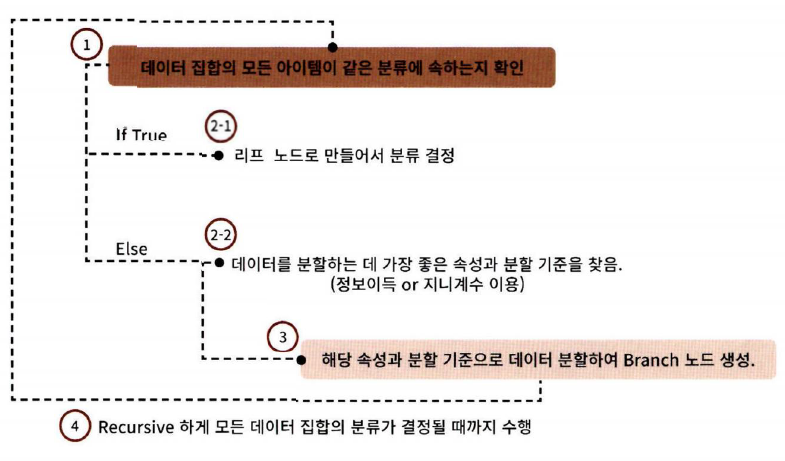

**결정 트리 모델의 특징**

가장 큰 장점은 정보의 '균일도'라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적.

가장 큰 단점은 과적합으로 정확도가 떨어진다는 점.

서브 트리를 계속 만들면 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 커지고 복잡해짐

->트리의 크기를 사전에 제한하는 것이 오히려 성능 튜닝에 더 도움이 됨

**결정 트리 파라미터**

사이킷런은 결정 트리 알고리즘을 구현한 DecisionTreeClassifier와 DecisionTreeRegressor 클래스 제공

CART(Classification And RegressionTrees) 알고리즘 기반.

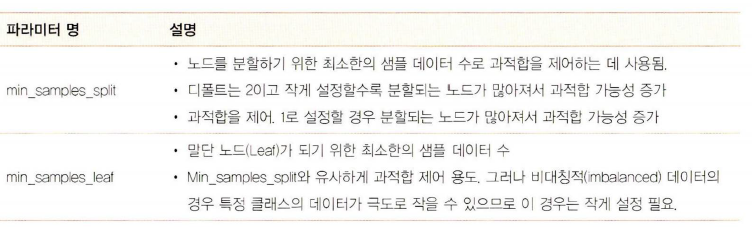

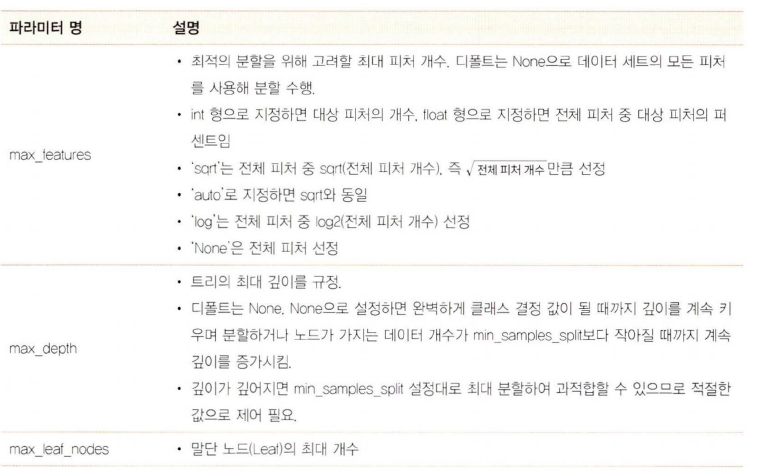

결정 트리의 알고리즘을 제이하는 대부분의 하이퍼 파라미터는 복잡한 트리가 생성되는 것을 막기 위한 용도

**결정 트리 모델의 시각화**

Graphviz 패키지 사용하여 결정 트리 알고리즘이 어떠한 규칙을 가지고 트리를 생성하는지 시각적으로 확인

사이킷런-export_graphviz( ) API 제공

In [27]:
pip install graphviz

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

#붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [29]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names = iris_data.feature_names, impurity=True, filled=True)

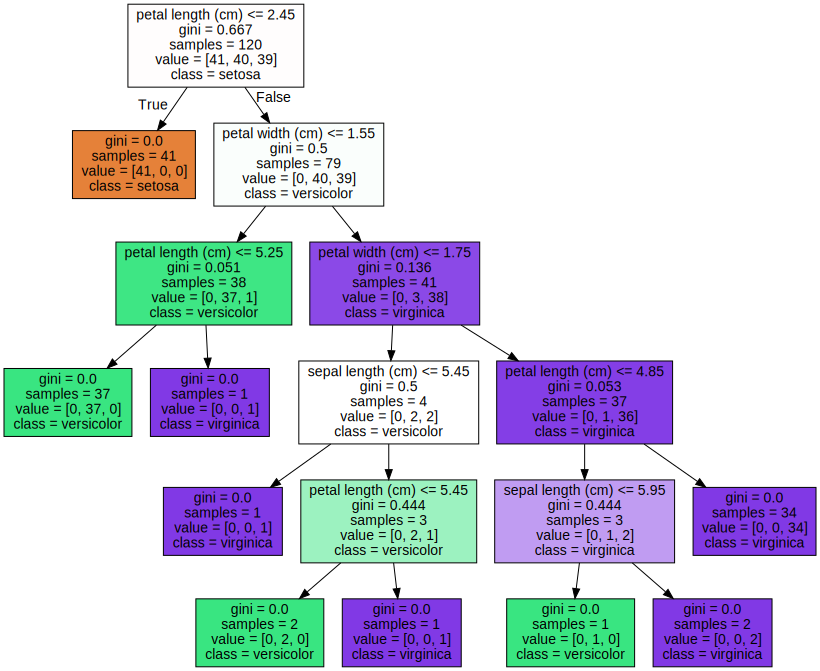

In [30]:
import graphviz

#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

* petal length(cm)<=2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건.이 조건이 없으면 리프 노드임
* gini는 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수
* samples는 현 규칙에 해당하는 데이터 건수
* value=[]는 클래스 값 기반의 데이터 건수
* 각 노드의 색은 붓꽃 데이터의 레이블 값 의미
* 색이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미

붓꽃 데이터 세트는 클래스 값으로 0,1,2를 가지고 있고

0:Setosa, 1: Versicolor, 2: Virginica 품종을 가리키므로

value=[41,40,39]는 Setosa 41개, Vesicolor 40개, Virginica 30개로 데이터가 구성되어있다는 의미.

---

결정 트리는 균일도에 기반해 **어떠한 속성을 규칙 조건으로 선택하느냐**가 중요한 요건

사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표를

DeicisionTreeClassifier 객체의 feature_importances_ 속성으로 제공

ndarray 형태로 값을 반환하며 피처 순서대로 값이 할당됨.

첫번째 피처->두번째 피처->...

값이 높을수록 피처의 중요도가 높다는 의미

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


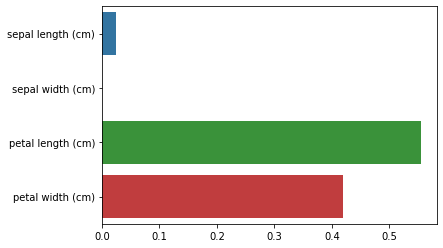

In [31]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature imortance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

#feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name,value))

#feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

->petal_legth가 가장 피처 중요도가 높음.

**결정 트리 과적합(Overfitting)**

분류를 위한 테스트용 데이터 생성(make_classification() 사용)

호출 시 피처 데이터 세트와 클래스 레이블 데이터 세트 반환됨

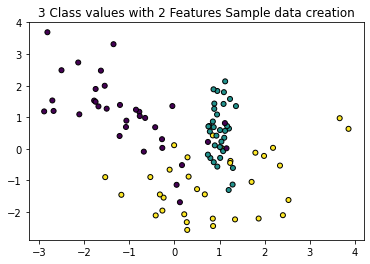

In [32]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

#2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1],marker='o', c=y_labels, s=25, edgecolor='k')

->각 피처가 X,Y축으로 나열된 2차원 그래프, 3개의 클래스 값 구분은 색깔로 되어있음

X_features와 y_labels 데이터 세트를 기반으로 결정 트리 학습할 것.

**첫번째 학습**-결정 트리 생성에 별다른 제약이 없도록 결정 트리의 하이퍼 파라미터를 디폴트로 설정

결정 트리 모델이 어떠한 결정 기준을 가지고 분할하면서 데이터를 분류하는지 확인

In [33]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

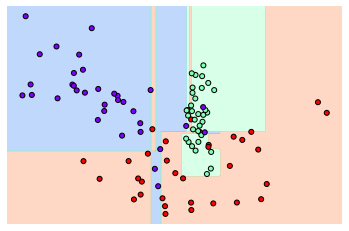

In [34]:
from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features,y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

->일부 이상치(Outlier) 데이터까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아짐

---

앙상블 학습의 유형은 **보팅(Voting), 배깅(Bagging), 부스팅(Boosting)**의 세 가지로 나뉨(+스태깅)

보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식.

차이점: 보팅은 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것

배깅은 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것.

대표적인 배깅 방식: 랜덤 포레스트 알고리즘

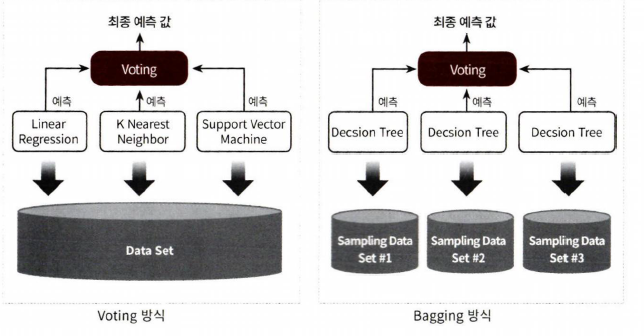

**Voting 방식**: 선형 회귀, K 최근접 이웃, 서포트 벡터 머신(3개의 ML 알고리즘)

**Bagging 방식**:

* 부트스트래핑(Bootstrapping) 분할 방식: 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식
* 데이터 세트 간에 중첩 허용(교차검증과 달리)
* 여러 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에는 가중치(weight) 부여하며 학습과 예측 진행
* 대표적인 부스팅 모듈: 그래디언트 부스트, XGBoost,LightGBM(Light Gradient Boost)

**스태깅**: 여러가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법

**보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)**

<u>하드 보팅</u>: 다수결 원칙과 비슷함

예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정하는 것

<u>소프트 보팅</u>:

분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정

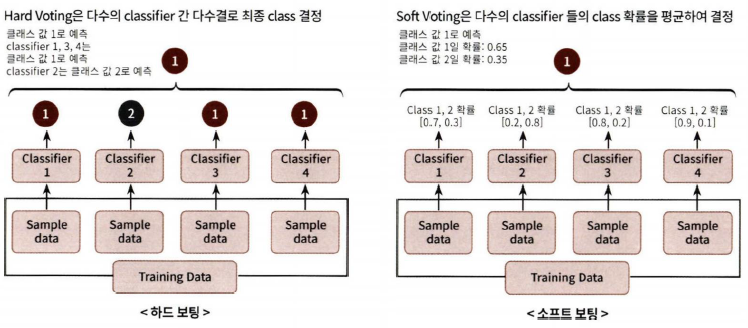

일반적으로 소프트 보팅이 예측 성능이 좋아서 더 많이 사용됨

**보팅 분류기(Voting Classifier)**

보팅 방식의 앙상블 구현-VotingClassifier 클래스

보팅 방식의 앙상블을 이용해 위스콘신 유방암 데이터 세트 예측 분석해보기

로지스틱 회귀와 KNN을 기반으로 보팅 분류기 만들어보기

In [35]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


로지스틱 회귀와 KNN을 기반으로 소프트 보팅 방식으로 새롭게 보팅 분류기 만들기

In [36]:
#개별 모델은 로지스틱 회귀와 KNN임.
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)], voting='soft')
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

#VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred=vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:4f}'.format(accuracy_score(y_test, pred)))

#개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test,pred)))

Voting 분류기 정확도: 0.947368
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


보팅 분류기가 정확도 조금 높게 나옴

항상 보팅 분류기가 기반 분류기보다 예측 성능이 향상되지는 않음

ML 모델의 성능은 다양한 테스트 데이터에 의해 검증되므로 <u>어떻게 높은 유연성을 가지고 현실에 대처할 수 있는가</u>가 중요한 ML 모델의 평가요소가 됨

결정 트리 알고리즘은 과적합 발생하기 쉬움.

이 같은 결정 트리 알고리즘의 단점을 앙상블 학습에선 많은 분류기를 결합해 다양한 상황을 학습하게 함으로써 극복

(결정 트리 알고리즘의 장점은 그대로 취하고 단점은 보완하며 편향-분산 트레이드오프의 효과 극대화 가능)

## **04 랜덤 포레스트**

**랜덤 포레스트의 개요 및 실습**

배깅(bagging)은 같은 알고리즘으로 여러 개의 분류기를 만들어서 최종 결정하는 알고리즘

ex)랜덤 포레스트

* 기반 알고리즘: 결정 트리 알고리즘
* 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정

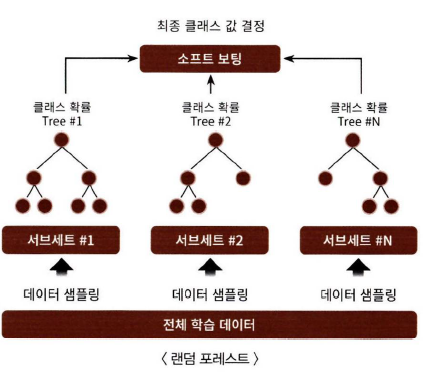

랜덤 포레스트는 개별적인 분류기의 기반 알고리즘은 결정트리지만 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트임.

이렇게 여러 개의 데이터 세트를 중첩되게 분리하는 것

:**부트스트래핑(bootstrapping)** 분할 방식

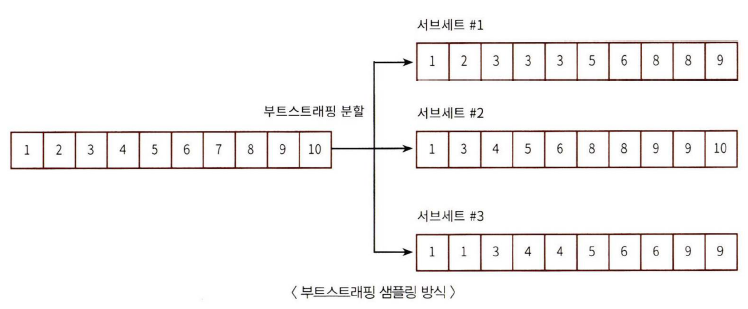

In [37]:
#사용자 행동 인식 데이터 세트
#데이터 로드
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
feature_name_df = pd.read_csv('/content/drive/MyDrive/features.txt', sep='\s+',
                              header=None,names=['column_index','column_name'])
feature_name = feature_name_df.iloc[:,1].values.tolist()

In [38]:
#중복된 피처명에 _1,_2를 추가해 새로운 피처명을 가지는 DataFrame 반환하는 함수 생성
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name',
                                                            'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                            if x[1]>0 else x[0], axis=1)
  new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
  return new_feature_name_df

In [39]:
def get_human_dataset():

  #각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
  feature_name_df = pd.read_csv('/content/drive/MyDrive/features.txt', sep='\s+',
                              header=None,names=['column_index','column_name'])
  
  #중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규  피처명 DataFrame 생성
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  #DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 반환
  feature_name = new_feature_name_df.iloc[:,1].values.tolist()

  #학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
  X_train = pd.read_csv('/content/drive/MyDrive/X_train.txt', sep='\s+', names=feature_name)
  X_test = pd.read_csv('/content/drive/MyDrive/X_test.txt', sep='\s+', names=feature_name)

  #학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv('/content/drive/MyDrive/y_train.txt', sep='\s+', header=None, names=['action'])
  y_test = pd.read_csv('/content/drive/MyDrive/y_test.txt', sep='\s+', header=None, names=['action'])

  #로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

#랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


**랜덤 포레스트 하이퍼 파라미터 및 튜닝**

트리 기반의 앙상블 알고리즘의 단점:
* 하이퍼 파라미터가 너무 많음
* 이로 인해 튜닝을 위한 시간 많이 소모
* 그럼에도 튜닝 후 예측 성능이 크게 향상되는 경우가 많지 않음

* n_estimators: 랜덤 포레스트에서 결정 트리의 개수 지정(default=10) 많이 설정할수록 좋은 성능(무한대로 정비례?X)(늘릴수록 수행시간 오래걸림)
* max_features: 결정 트리에 사용된 max_features 파라미터와 같음

* max_depth나 min_samples_leaf와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 랜덤 포레스트에도 똑같이 적용될 수 있음

In [ ]:
#이번에는 GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터 튜닝해보기
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6,8,10,12],
    'min_samples_leaf' : [8,12,18],
    'min_samples_split' : [8,16,20]
}
#RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
#n_estimators를 300으로 증가시키고, 최적화 하이퍼 파라미터로 다시 RandomForestClassifier를 학습시킨 뒤
#이번엔 별도의 테스트 데이터 세트에서 예측 성능 측정
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8,
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train,y_train)
pred=rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

In [ ]:
#피처의 중요도 시각화하기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## **05 GBM(Gradient Boosting Machine)**

**GBM의 개요 및 실습**

부스팅 알고리즘: 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하며 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식

대표적인 구현: AdaBoost(Adaptive boosting)와 그래디언트 부스트

**에이다 부스트(AdaBoost)**: 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘

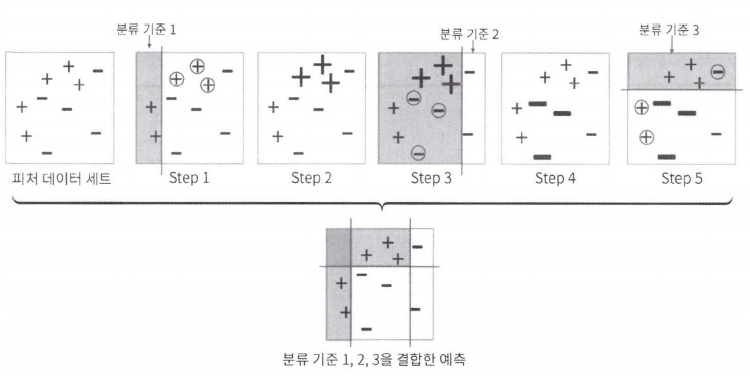

* Step 1은 첫번째 약한 학습기(weak learner)가 분류 기준 1로 +와 -를 분류한것. 동그라미로 표시된 데이터는 잘못 분류된 오류 데이터
* Step 2에서는 이 오류 데이터에 대해서 가중치 값 부여. 가중치가 부여된 오류 + 데이터는 다음 약한 학습기가 더 잘 분류할 수 있게 크기가 커짐
* Step 3은 두번째 약한 학습기가 분류 기준 2로 +와 -를 분류함. 마찬가지로 동그라미로 표시된 데이터는 잘못 분류된 데이터
* Step 4에서는 잘못 분류된 이 - 오류 데이터에 대해 다음 약한 학습기가 잘 분류할 수 있게 더 큰 가중치 부여
* Step 5는 세번째 약한 학습기가 분류 기준 3으로 +와 -를 분류하고 오류 데이터를 찾음. 에이다 부스트는 이렇게 약한 학습기가 순차적으로 오류 값에 대해 가중치를 부여한 예측 결정 기준을 모두 결합해 예측 수행
* 마지막으로 맨 아래는 1,2,3번째 약한 학습기를 모두 결합한 결과 예측. 개별 약한 학습기보다 훨씬 정확도 높아짐

GBM(Gradient Boost Machine)도 에이다부스트와 유사하나, 가중치 업데이트를 **경사 하강법(Gradient Descent)**을 이용하는 것이 큰 차이

오류값 = 실제값 - 예측값

분류의 실제 결괏값을 y, 피처를 x1,x2,...xn, 이 피처에 기반한 예측 함수를 F(x) 함수라 하면

오류식 h(x) = y - F(x)

이 오류식을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트하는 것이 경사 하강법(Gradient Descent)

In [ ]:
#GBM을 이용해 사용자 행동 데이터 세트 예측 분류
#GBM으로 학습하는 수행 시간도 측정
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

#GBM 수행 시간 측정을 위함. 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f} 초 '.format(time.time() - start_time))

일반적으로 GBM이 랜덤 포레스트보다는 예측 성능이 조금 뛰어난 경우가 많음

하지만 수행 시간이 오래 걸리고 하이퍼 파라미터 튜닝 노력도 더 필요함

**GBM 하이퍼 파라미터 및 튜닝**

* loss: 경사 하강법에서 사용할 비용 함수 지정. default = 'deviance'
* learning_rate: GBM이 학습을 진행할 때마다 적용하는 학습률. Weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수. 0~1(default=0.1)
* n_estimators: weak learner의 개수. 개수 많을수록 수행 시간 오래걸림. default=100
* subsample: weak learner가 학습에 사용하는 데이터의 샘플림 비율. default=1. 이는 전체 학습 데이터를 기반으로 학습한다는 의미

In [ ]:
#GridSearchCV를 이용해 하이퍼 파라미터 최적화
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,500],
    'learning_rate' : [0.05,0.1'
}
grid_cv = GridSearchCV(gb_clf, param_grid=params,cv=2,verbose=1)
grid_cv.fit(X_train,y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
#GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행
gb_pred = grid_cv.best_estimator_predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM은 과적합에도 강한 뛰어난 예측 성능을 가진 알고리즘이지만 수행 시간이 오래걸림